# Assignment Week 2 

* Answer each question completely. 
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [43]:
missing_values = df.isna().sum()
print(missing_values)

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [ ]:
df

From this we got to know that the 'year' is present for every row. And, 'transmission' has the highest number of missing values. So, for every vehicle there is a particular year, state, seller, mmr, sellingprice, saledate.

## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [45]:
df['condition'] = df['condition'].astype(str)

df['saledate'] = pd.to_datetime(df.saledate, errors='coerce')

#Reference for converting datetime: https://stackoverflow.com/questions/36692861/avoiding-error-from-pd-to-datetime-in-pandas

df['mmr'] = pd.to_numeric(df.mmr, errors='coerce')

#Reference for converting numeric: https://stackoverflow.com/questions/73764054/pandas-to-numericerrors-coerce-does-not-convert-invalid-value-to-nan

Condition is actually an object. Firstly, I tried to change it as floating but, there are some string values so, that's why I converted it into a string. 'salesdata', I converted into datetime. as, we have to use it for future references.

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [72]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
make = set(makes)
make = list(make)
make

#Reference for the Set: https://www.geeksforgeeks.org/python-set-method/

['dodge tk',
 'porsche',
 'dot',
 'toyota',
 'ford truck',
 'buick',
 'jaguar',
 'gmc',
 'lamborghini',
 'infiniti',
 'gmc truck',
 'chevrolet',
 'lincoln',
 'mini',
 'subaru',
 'hummer',
 'lexus',
 'mercedes-b',
 'lotus',
 'cadillac',
 'ram',
 'ford tk',
 'volvo',
 'mercedes',
 'scion',
 'mercury',
 'nan',
 'bmw',
 'nissan',
 'ferrari',
 'saturn',
 'isuzu',
 'aston martin',
 'tesla',
 'vw',
 'ford',
 'land rover',
 'saab',
 'audi',
 'acura',
 'daewoo',
 'mazda',
 'fisker',
 'dodge',
 'fiat',
 'mazda tk',
 'chrysler',
 'suzuki',
 'chev truck',
 'geo',
 'volkswagen',
 'smart',
 'kia',
 'honda',
 'oldsmobile',
 'airstream',
 'hyundai tk',
 'pontiac',
 'rolls-royce',
 'bentley',
 'plymouth',
 'jeep',
 'landrover',
 'maserati',
 'mercedes-benz',
 'hyundai',
 'mitsubishi']

After reducing the number of makers. Now, we can easily understand that which company making more sales for each year. Like, we will get lot of more information after reducing the number of columns.

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [98]:
correlation = df.corr().loc['mmr', 'sellingprice']
print('Overall correlation b/w MMR and Selling Price is', correlation)

Overall correlation b/w MMR and Selling Price is 0.9836337168977242


In [99]:
price_ranges = [(0, 10000), (0, 20000), (0, 30000), (0, 40000), (0, 50000), (0, 60000), (0, 70000), (0, 80000), (0, 90000), (0, 100000), (0, 110000), (0, 120000), (0, 130000), (0, 140000), (0, 150000), (0, 160000), (0, 170000), (0, 180000), (0, 190000), (0, 200000), (0, 210000), (0, 220000), (0, 230000)]

X = []
Y = []
print('correlation for selling price window')
print('\n')
for price_range in price_ranges:
    start, end = price_range
    group_df = df[df["sellingprice"].between(start, end, inclusive = 'both')]
    corr = group_df['mmr'].corr(group_df['sellingprice'])
    X.append(end)
    Y.append(corr)
    print(f'{start} - {end} is {corr}')



correlation_dict = {}
for price_range, corr in correlation_dict.items():
    start, end = price_range.left, price_range.right
    X.append(f'{start} - {end}')
    Y.append(corr)


correlation for selling price window


0 - 10000 is 0.8743542721249598
0 - 20000 is 0.9584428323123231
0 - 30000 is 0.9744203460442981
0 - 40000 is 0.9791682459086493
0 - 50000 is 0.9812713466602431
0 - 60000 is 0.9822401960311057
0 - 70000 is 0.982708264353825
0 - 80000 is 0.983186257681986
0 - 90000 is 0.9834269274590383
0 - 100000 is 0.9835761128330059
0 - 110000 is 0.9835897120182319
0 - 120000 is 0.9836722973053684
0 - 130000 is 0.9837452115182911
0 - 140000 is 0.9838139061890904
0 - 150000 is 0.9838873814578466
0 - 160000 is 0.9839572313793203
0 - 170000 is 0.9840077311787884
0 - 180000 is 0.9840226043763775
0 - 190000 is 0.9840312414363551
0 - 200000 is 0.9840312414363551
0 - 210000 is 0.9840312414363551
0 - 220000 is 0.9840312414363551
0 - 230000 is 0.9836337168977266


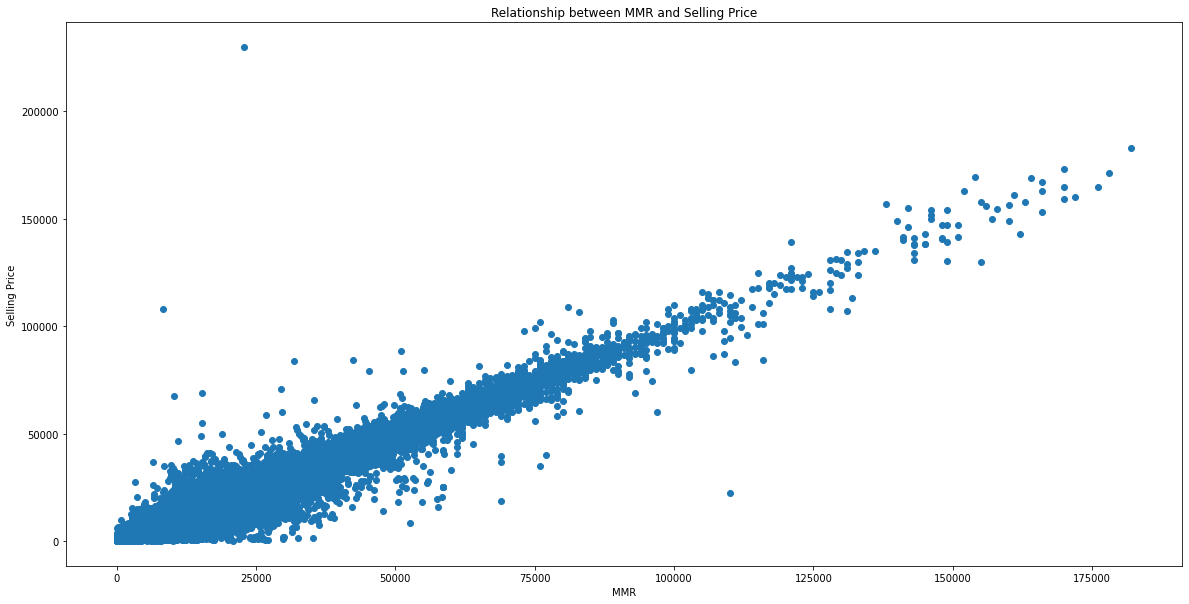

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.scatter(df['mmr'], df['sellingprice'])
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.title('Relationship between MMR and Selling Price')
plt.show()

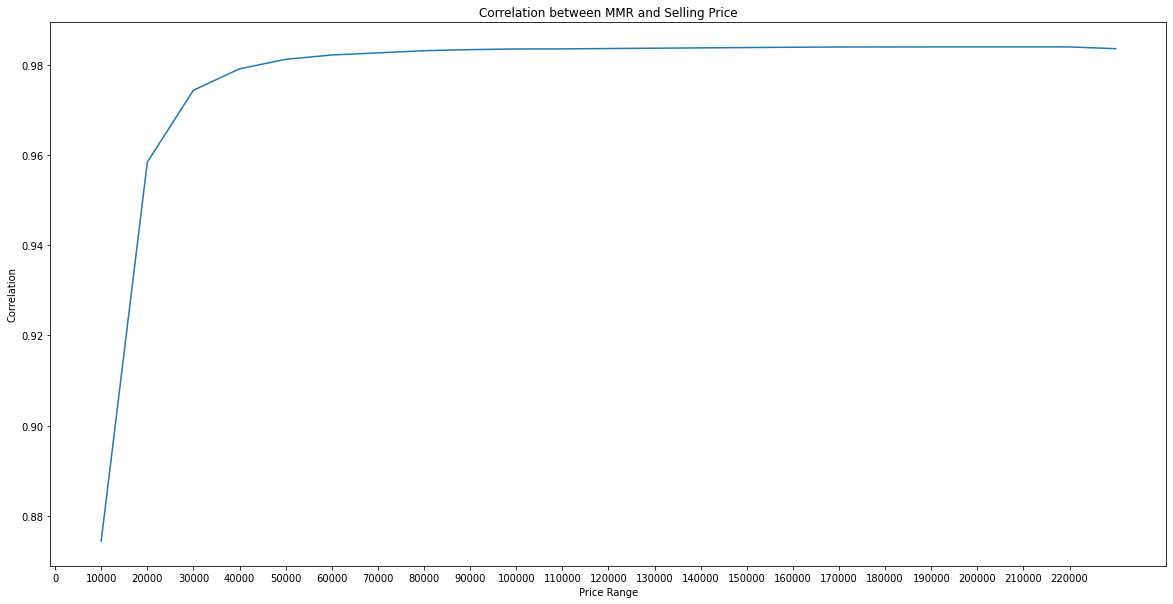

In [103]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(X, Y)
plt.xlabel("Price Range")
plt.ylabel("Correlation")
plt.xticks(np.arange(0, 230000, 10000))
plt.title("Correlation between MMR and Selling Price")
plt.show()



*   A correlation coefficient of 0.9836337168977242 is close to 1, which suggests that there is a strong positive linear relationship between MMR and Selling Price. This means that as the Whole Price increases, the Selling Price also tends to increase.
*   As we can observe that the correlation factor for salesprice windows is gradually increasing. But, in '0-230000' is slightly dropped.



## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

In [84]:
#Finding the most common makers

df.make = df.make.str.lower()
maker = df['make'].value_counts().head(10)
maker

ford         93997
chevrolet    60587
nissan       54017
toyota       39966
dodge        30955
honda        27351
hyundai      21836
bmw          20793
kia          18084
chrysler     17485
Name: make, dtype: int64

Sample narrative description.

In [85]:
#Just giving the most common car makers to common list

common = ['ford','chevrolet','nissan','toyota','dodge','honda','hyundai','bmw','kia','chrysler']

In [105]:
df_1 = df['make'].isin(common)
df_2 = df['year']>=2010
df_3 = df['year']>=2015

final_df = df[(df_1) & ((df_2) &(df_3))]

# Just finding 10 most common make for cars made between 2010-2015

In [106]:
final_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500.0,21500,2014-12-16 12:30:00+08:00
1,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800.0,21500,2014-12-16 12:30:00+08:00
5,2015,nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900,2014-12-30 12:00:00+08:00
11,2015,kia,Optima,LX,Sedan,automatic,5xxgm4a73fg353538,ca,4.8,2034.0,red,tan,kia motors finance,15150.0,17700,2014-12-16 12:00:00+08:00
12,2015,ford,Fusion,SE,Sedan,automatic,3fa6p0hdxfr145753,ca,2,5559.0,white,beige,enterprise vehicle exchange / tra / rental / t...,15350.0,12000,2015-01-13 12:00:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558728,2015,ford,Fusion,SE,sedan,NaN,3fa6p0h7xfr132222,pa,4.1,1083.0,black,black,best auto wholesale,17650.0,16500,2015-06-19 02:15:00+07:00
558778,2015,nissan,Altima,2.5 S,sedan,NaN,1n4al3ap2fn332581,tx,1,1.0,red,gray,hertz/tra,16000.0,4000,2015-06-25 07:10:00+07:00
558787,2015,nissan,Altima,2.5 S,sedan,NaN,1n4al3ap3fn379506,tn,4.1,9319.0,silver,—,enterprise vehicle exchange/franklin,15500.0,10000,2015-07-02 06:45:00+07:00
558832,2015,kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300.0,33000,2015-07-09 07:00:00+07:00


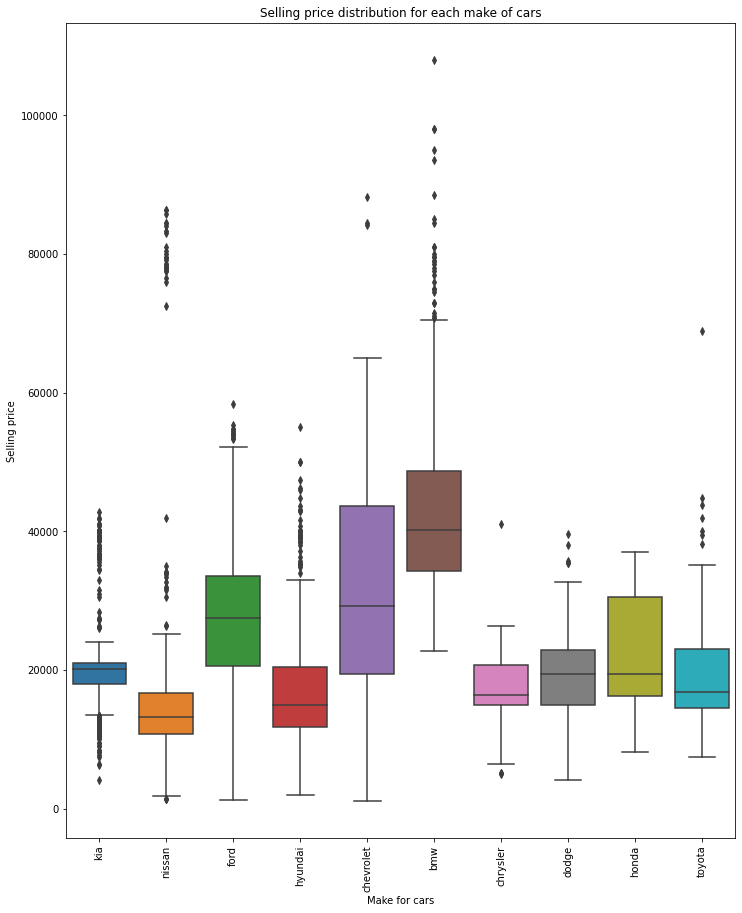

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,15))
sns.boxplot(x='make', y='sellingprice', data=final_df)
plt.xlabel('Make for cars')
plt.ylabel('Selling price')
plt.title('Selling price distribution for each make of cars')
plt.xticks(rotation=90)
plt.show()



*   The Selling Price of Nissan car maker is less when compared to other car makers from 2010 to 2015
*   The median selling price of BMW car maker is high when compared to other car makers and this car have the highest selling price.


*   When we observed the above box plot, We can see that that almost all of the median selling price of the car makers is lied between 10000 to 20000 except ford, Chevorlet, bmw.


*   Chevorlet car maker has the normal distribution when compared to other car makers.






